# Exercise Set 6

Due: **9:30 16 May 2022**

Discussion: **13:00 20 May 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# 1. *Kepler* [60 points]

The [*Kepler* mission](https://keplerscience.arc.nasa.gov/science.html) was a planet-hunting mission from 2009-2018, during which time it observed thousands of stars to search for periodic variability.

 > **a)** *Kepler* observed 306604 stars in its lifetime, 3664 of which were identified as candidates for hosting a planet. In total, there were 9564 planet candidates (called Kepler Objects of Interest or KOI) including 4847 false positives. Assume that an object identified as a candidate by *Kepler* has a 50% chance of being a false positive if we account the relevant physics. Do the results from *Kepler* suggest that we accounted for all of the physics? What are the null and alternative hypotheses? Make the relevant plots, including the shaded regions of interest. **30 points**

In [2]:
# number of keppler objects of interest
num_koi = 9564
# number of false positives
num_false_pos = 4847
# probability of a false positive
prob = 0.5
# sample proportion
p_sam = 1 - (num_false_pos / num_koi)
print(p_sam, " = sample proportion")
# standard error
SE = np.sqrt(prob * (1 - prob) / num_koi)
# Test statistic
z = (p_sam - prob) / SE
print("z = ", z)
# confidence interval
alpha = 0.05
cv = st.norm.ppf(1 - alpha)
print("cv = ", cv)

0.4932036804684232  = sample proportion
z =  -1.3293017257981616
cv =  1.6448536269514722


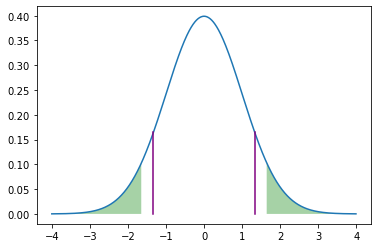

In [3]:
plt.figure(0)
plt.fill_between(
    x=np.arange(-4, -cv, 0.01),
    y1=st.norm.pdf(np.arange(-4, -cv, 0.01)),
    facecolor="g",
    alpha=0.35,
)
plt.plot(np.arange(-4, 4, 0.01), st.norm.pdf(np.arange(-4, 4, 0.01)))
plt.fill_between(
    x=np.arange(cv, 4, 0.01),
    y1=st.norm.pdf(np.arange(cv, 4, 0.01)),
    facecolor="g",
    alpha=0.35,
)
plt.plot(
    np.full_like(np.zeros(10), z), np.linspace(0, st.norm.pdf(z), 10), color="purple"
)
plt.plot(
    np.full_like(np.zeros(10), -z), np.linspace(0, st.norm.pdf(z), 10), color="purple"
)

In [4]:
# What are the null and alternative hypothesis?
# Null hypothesis p=0.5
# Alternative hypothesis p>0.5 or p<0.5
# Do the hypothesis test

 > **b)** *Kepler* observed 8 planets within the habitable zone. Knowing that 6 of these planets orbit Sun-like stars while the others orbit red dwarfs, can you determine if a correlation must exist between stellar type and the occurance of an Earth-analogue planet? Show the simulation results. What is the probability of observing the planets we did? **30 points**

In [20]:
prob_sun_like = 0.75
prob_red_dwarfs = 0.25

# 2. Small sample proportions [40 points]

There was a survey to determine if people were satisfied with their life, and it cross-referenced this with their income. The data is as follows:

| **GDP**     | less than €5000 | between €5000 and €50000 | more than €50000 |
| ----------: | ---------------: | -------------------------: | ----------------: |
| Satisfied   | 18               | 62                         | 6                 |
| Unsatisfied | 20               | 34                         | 3                 |

Use a $\chi^2$ test to determine if there is a correlation between income and general life satisfaction. Make the relevant plots. **40 points**

In [8]:
# sample size less than 5000
# n_lt=38
# sample size between 5000 and 50000
# n_bt=96
# sample size more than 50000
# n_mt=9

# defining the table
data = [[18, 62, 6], [20, 34, 3]]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

print("Null Hypothesis: no correlation between income and general life satisfaction")
print("stat: ", stat)

p value is 0.17065308496298592
Independent (H0 holds true)
Null Hypothesis: no correlation between income and general life satisfaction
stat:  3.5362450521448467


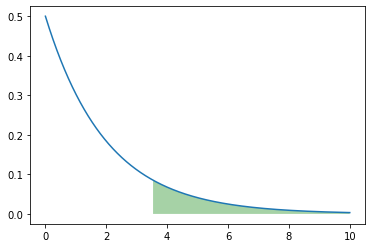

In [19]:
# plots
# x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 10, 0.001)
plt.figure()
plt.plot(x, chi2.pdf(x, df=dof))
plt.fill_between(
    x=np.arange(stat, 10.0, 0.01),
    y1=chi2.pdf(np.arange(stat, 10.0, 0.01), df=dof),
    facecolor="g",
    alpha=0.35,
)